In [14]:
from datasets import load_dataset

ds = load_dataset("naver-clova-ix/cord-v2")

In [15]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'ground_truth'],
        num_rows: 800
    })
    validation: Dataset({
        features: ['image', 'ground_truth'],
        num_rows: 100
    })
    test: Dataset({
        features: ['image', 'ground_truth'],
        num_rows: 100
    })
})

In [ ]:
print(ds['validation'][2]) # Try to inspect an example

KeyError: 'dev'

/var/folders/q6/jktgd1z940n49clz1fxq171w0000gp/T/ipykernel_52754/2833838587.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


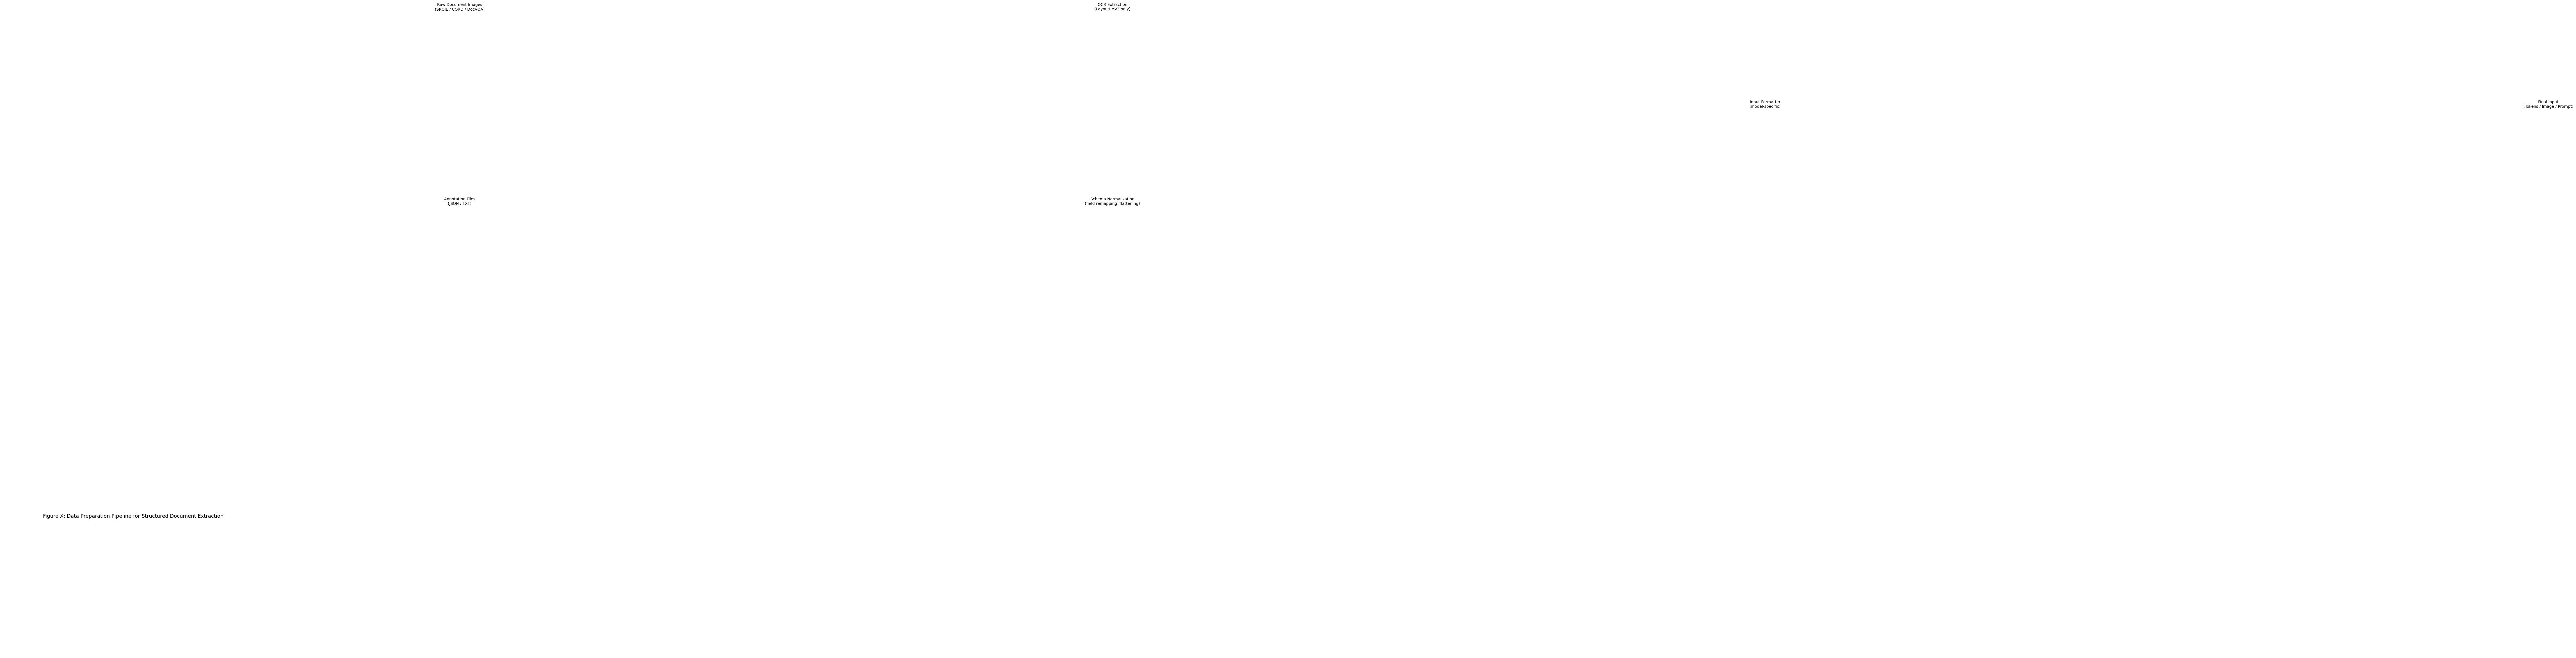

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the canvas again after state reset
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Define boxes and positions
elements = [
    ("Raw Document Images\n(SROIE / CORD / DocVQA)", (0.5, 4.5)),
    ("OCR Extraction\n(LayoutLMv3 only)", (3, 4.5)),
    ("Annotation Files\n(JSON / TXT)", (0.5, 3)),
    ("Schema Normalization\n(field remapping, flattening)", (3, 3)),
    ("Input Formatter\n(model-specific)", (5.5, 3.75)),
    ("Final Input\n(Tokens / Image / Prompt)", (8.5, 3.75))
]

# Draw boxes
for text, (x, y) in elements:
    ax.add_patch(patches.FancyBboxPatch((x, y), 2.5, 1,
                                        boxstyle="round,pad=0.02",
                                        edgecolor='black',
                                        facecolor='#E1F5FE'))
    ax.text(x + 1.25, y + 0.5, text, ha='center', va='center', fontsize=10)

# Arrows between boxes
arrows = [
    ((0.5 + 2.5, 4.5 + 0.5), (3, 4.5 + 0.5)),  # Raw Image to OCR
    ((0.5 + 2.5, 3 + 0.5), (3, 3 + 0.5)),  # Annotations to Schema Norm
    ((3 + 2.5, 3.75 + 0.5), (5.5, 3.75 + 0.5)),  # Schema to Formatter
    ((5.5 + 2.5, 3.75 + 0.5), (8.5, 3.75 + 0.5))  # Formatter to Final Input
]

for start, end in arrows:
    ax.annotate('', xy=end, xytext=start, arrowprops=dict(arrowstyle='->'))

plt.title("Figure X: Data Preparation Pipeline for Structured Document Extraction", fontsize=13, pad=20)
plt.tight_layout()
plt.show()